Loaded dataset: 1 images, 1 person instances, 0 failed
<class 'numpy.ndarray'>
(256, 192, 3)
<class 'numpy.ndarray'>
(790, 1420, 3)


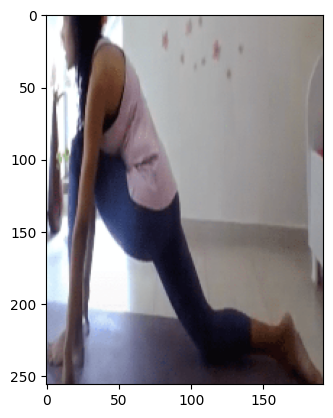

In [ ]:

from torch.utils.data import Dataset, DataLoader
import torch
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from dataloader.yolo_dataset import YOLOPoseDataset

# Example usage with DataLoader
if __name__ == "__main__":
    dataset = YOLOPoseDataset(
        img_dir=r"D:\LearnAtPuwell\POSE_ESTIMATION\yolo_dataset_split\yolo_dataset_split\test_dataloader\images",
        label_dir=r"D:\LearnAtPuwell\POSE_ESTIMATION\yolo_dataset_split\yolo_dataset_split\test_dataloader\labels",
        input_size=(256, 192),
        num_joints=33,
        sigma=2
    )
    
    dataloader = DataLoader(
        dataset, 
        batch_size=16, 
        shuffle=True, 
        num_workers=4,
        pin_memory=True
    )
    
    # Test
    for batch in dataloader:
        img = batch['image']  # (B, 3, 256, 192)
        heatmaps = batch['heatmaps']  # (B, 33, 32, 24)
        mask = batch['mask']  # (B, 33, 1, 1)
        kpts = batch['kpts']  # (B, 33, 2)
        vis = batch['vis']  # (B, 33)
        
        img = img[0].permute(1, 2, 0).numpy().astype(np.float32)  # (256, 192, 3)
        de_norm_img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        
        img_cv2 = (de_norm_img * 255).astype(np.uint8)
        # img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
        de_norm_kp = []
        for kpt in kpts[0]:
            de_norm_x = kpt[0].item() * dataset.input_size[1]
            de_norm_y = kpt[1].item() * dataset.input_size[0]

            cv2.circle(img_cv2, 
                       (int(de_norm_x), int(de_norm_y)), 
                       3, (0, 255, 0), -1)
            de_norm_kp.append((de_norm_x, de_norm_y))

        plt.imshow(img_cv2)
        plt.show()


Class: 0, BBox: (416, 265), (1320, 719)


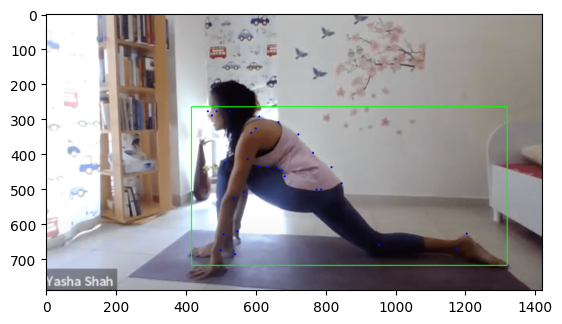

In [12]:
#visualize dataset 
import cv2
import matplotlib.pyplot as plt

image_path = r"D:\LearnAtPuwell\POSE_ESTIMATION\yolo_dataset_split\yolo_dataset_split\test_dataloader\images\000000000048.png"
label_path = r"D:\LearnAtPuwell\POSE_ESTIMATION\yolo_dataset_split\yolo_dataset_split\test_dataloader\labels\000000000048.txt"

with open(label_path, 'r') as f:
    lines = f.readlines()
img = cv2.imread(image_path)
h, w = img.shape[:2]
for line in lines:
    parts = line.strip().split()
    class_id = int(parts[0])
    x_center = float(parts[1])*w
    y_center = float(parts[2])*h
    width = float(parts[3])*w
    height = float(parts[4])*h

    keypoints = []
    for i in range(5, len(parts), 3):
        kp_x = float(parts[i])*w
        kp_y = float(parts[i+1])*h
        keypoints.append((kp_x, kp_y))
    
    for kp in keypoints:
        cv2.circle(img, (int(kp[0]), int(kp[1])), 3, (255, 0, 0), -1)


    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    print(f"Class: {class_id}, BBox: ({x1}, {y1}), ({x2}, {y2})")
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    

 

